In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
import pickle
with open(r"C:\Users\tejes\Desktop\MINI PROJECT\dev_letter_D.p","rb") as f:
    db=pickle.load(f,encoding='bytes')
print("number of letter images in the dataset are:",str(len(db)))

number of letter images in the dataset are: 7702


This dataset has been created for the research and development of a Sanskrit OCR.
The dataset contains 7702 images of sanskrit(Devanagari) letters belonging to 602 classes.

The dataset is structured in the following manner:
	The data is in the form of a 2D array.
	The first dimension indicates the indexed letter in the dataset.
	The second dimension is again a 1D dimensional array containing three elements- 
		 The first element is the image in array form.
		 The second element is the corresponding class index number.
		 The third element is the corresponding English class Annotation.


In [3]:
i=59
try:
    img=db[i][0]
    class_index=db[i][1]
    class_annoation=db[i][2]
    resized_img=cv2.resize(img,(200,200))
    cv2.imshow("Sanskrit image",resized_img)
    cv2.waitKey(1000)
    cv2.destroyAllWindows()
    print("the class index number of the sanskrit letter image is:"+str(class_index))
    print("the class annotation of the sanskrit letter image is:"+str(class_annoation))
except:
    print("index out of range")

the class index number of the sanskrit letter image is:41
the class annotation of the sanskrit letter image is:cha


## Info of Dataset

In [4]:
print("dataset length:",len(db))
print("the dataset type is:",type(db))
print("first entry:",[db[0]])

dataset length: 7702
the dataset type is: <class 'list'>
first entry: [[array([[[211, 243, 254],
        [211, 243, 254],
        [210, 242, 253],
        ...,
        [199, 227, 234],
        [197, 225, 232],
        [198, 226, 233]],

       [[210, 242, 253],
        [210, 242, 253],
        [208, 240, 251],
        ...,
        [205, 233, 240],
        [197, 225, 232],
        [188, 216, 223]],

       [[208, 240, 251],
        [208, 240, 251],
        [206, 238, 249],
        ...,
        [210, 237, 244],
        [199, 226, 233],
        [179, 206, 212]],

       ...,

       [[210, 240, 251],
        [211, 241, 251],
        [212, 242, 252],
        ...,
        [217, 246, 250],
        [216, 246, 250],
        [216, 245, 250]],

       [[210, 240, 251],
        [211, 241, 251],
        [213, 242, 251],
        ...,
        [216, 245, 249],
        [216, 246, 250],
        [215, 245, 249]],

       [[211, 241, 252],
        [211, 240, 251],
        [210, 239, 249],
        ...,
  

## Checking any Malformed Entries

In [5]:
for i,entry in enumerate(db):
    if isinstance(entry,list) and len(entry)==3:
        if not isinstance(entry[0],np.ndarray):
            print(f"entry {i} is not a numpy array")
    else:
        print(f"malformed entry at index {i}:{entry}")
    if i>=15:
        break

## Preprocessing

In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [7]:
try:
    images=np.array([np.array(entry[0]) for entry in db])
    lables=np.array([entry[1] for entry in db])

    images=images.astype('float32')/255.0

    num_classes=len(set(lables))
    lables=to_categorical(lables,num_classes)

    if len(images.shape)==3:
        images=images[...,np.newaxis]

    x_train,x_temp,y_train,y_temp=train_test_split(images,lables,test_size=0.3,random_state=42)
    x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

    print("Preprocessing completed successfully")
    print("x_train shape:",x_train.shape)
    print("y_train shape:",y_train.shape)
    print("x_val shape:",x_val.shape)
    print("y_val shape:",y_val.shape)
    print("x_test shape:",x_test.shape)
    print("y_test shape:",y_test.shape)

except Exception as e:
    print(f"Error in preprocessing:{e}")

Preprocessing completed successfully
x_train shape: (5391, 32, 32, 3)
y_train shape: (5391, 600)
x_val shape: (1155, 32, 32, 3)
y_val shape: (1155, 600)
x_test shape: (1156, 32, 32, 3)
y_test shape: (1156, 600)


## Creation of Models

In [8]:
from tensorflow.keras import models,layers

model=models.Sequential()


model.add (layers.Conv2D(32,(3,3),activation='relu',input_shape=x_train.shape[1:]))
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128,activation='relu'))

model.add(layers.Dense(num_classes,activation='softmax'))

model.summary()

C:\Users\tejes\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 600)                 │          77,400 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 236,312 (923.09 KB)

 Trainable params: 236,312 (923.09 KB)

 Non-trainable params: 0 (0.00 B)

## Compile The Model

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## Train The Model

In [10]:
history=model.fit(x_train,y_train,epochs=40,validation_data=(x_val,y_val))

Epoch 1/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.0341 - loss: 5.6081 - val_accuracy: 0.0459 - val_loss: 5.1702
Epoch 2/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.0675 - loss: 4.9807 - val_accuracy: 0.2563 - val_loss: 4.2147
Epoch 3/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.2972 - loss: 3.7368 - val_accuracy: 0.4511 - val_loss: 3.2298
Epoch 4/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.4976 - loss: 2.6409 - val_accuracy: 0.5723 - val_loss: 2.7420
Epoch 5/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.6367 - loss: 1.8750 - val_accuracy: 0.6537 - val_loss: 2.5225
Epoch 6/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.7228 - loss: 1.3920 - val_accuracy: 0.6978 - val_loss: 2.3039
Epoch 7/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.7742 - loss: 1.1164 - val_accuracy: 0.7169 - val_loss: 2.3672
Epoch 8/40
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.8156 - loss: 0.8080 - val_acc

## Evaluate The Model

In [11]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f"Test accuracy:{test_acc*100:.2f}%")
print(f"Test loss:{test_loss:.4f}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7361 - loss: 4.3728
Test accuracy:75.09%
Test loss:4.1360


## Plotting Model Performance

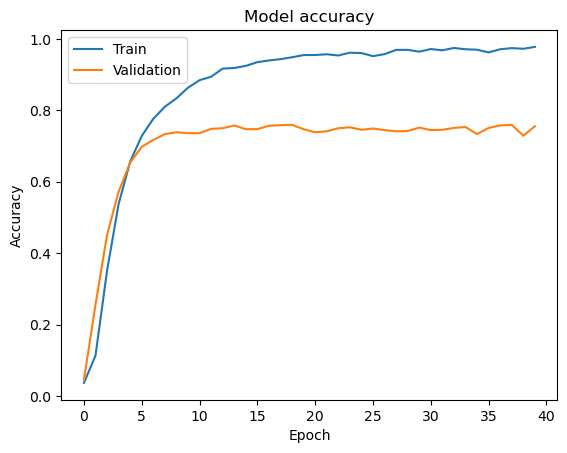

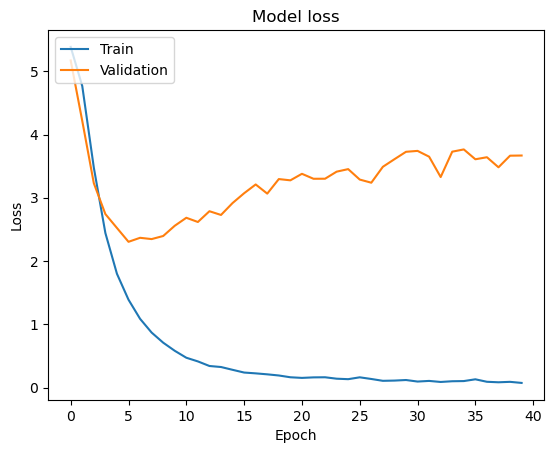

In [12]:
import matplotlib.pyplot as plt

#plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Defining The Hyperparameter Search Space

In [ ]:
from keras_tuner import Hyperband

def build_model(hp):
    model=models.Sequential()

    model.add(layers.Conv2D(filters=hp.Choice('conv_1_filter',values=[32,64,128]),kernel_size=hp.Choice('conv_1_kernel',values=[3,5]),activation='relu',input_shape=x_train.shape[1:]))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(filters=hp.Choice('conv_2_filter',values=[32,64,128]),kernel_size=hp.Choice('conv_2_kernel',values=[3,5]),activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Dropout(hp.Choice('dropout_rate',values=[0.2,0.3,0.5])))
    

    model.add(layers.Flatten())

    model.add(layers.Dense(units=hp.Choice('dense_units',values=[128,256,512]),activation='relu'))

    model.add(layers.Dense(num_classes,activation='softmax'))

    model.compile(optimizer=hp.Choice('optimizer',values=['adam','sgd']),loss='categorical_crossentropy',metrics=['accuracy'])

    return model

## Hyperband Search

In [ ]:
from kerastuner.tuners import Hyperband

tuner=Hyperband(build_model,
                objective='val_accuracy',
                max_epochs=40,
                factor=3,
                directory='tuner_dir',
                project_name='Sanskrit_OCR')

In [ ]:
tuner.search(x_train,y_train,epochs=10,validation_data=(x_val,y_val))

In [ ]:
# Evaluate the best-tuned model on the test set
best_model = tuner.get_best_models(num_models=1)[0]  # Get the best model
test_loss, test_acc = best_model.evaluate(x_test, y_test)

# Print the test accuracy and loss
print(f"Hypertuned model test accuracy: {test_acc * 100:.2f}%")
print(f"Hypertuned model test loss: {test_loss:.4f}")

In [18]:
import matplotlib.pyplot as plt

# Assuming `history` is the training history of the original model
# Retrieve the best model and its training history
best_model = tuner.get_best_models(num_models=1)[0]
best_history = best_model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10


c:\Users\tejes\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9437 - loss: 0.2086 - val_accuracy: 0.7697 - val_loss: 2.4093
Epoch 2/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9479 - loss: 0.1722 - val_accuracy: 0.7714 - val_loss: 2.5176
Epoch 3/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9446 - loss: 0.1854 - val_accuracy: 0.7645 - val_loss: 2.4521
Epoch 4/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9510 - loss: 0.1646 - val_accuracy: 0.7628 - val_loss: 2.5446
Epoch 5/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9499 - loss: 0.1694 - val_accuracy: 0.7541 - val_loss: 2.6673
Epoch 6/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9543 - loss: 0.1566 - val_accuracy: 0.7636 - val_loss: 2.6732
Epoch 7/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9668 - loss: 0.1334 - val_accuracy: 0.7654 - val_loss: 2.7785
Epoch 8/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9571 - loss: 0.1541 - val_accuracy: 0.761

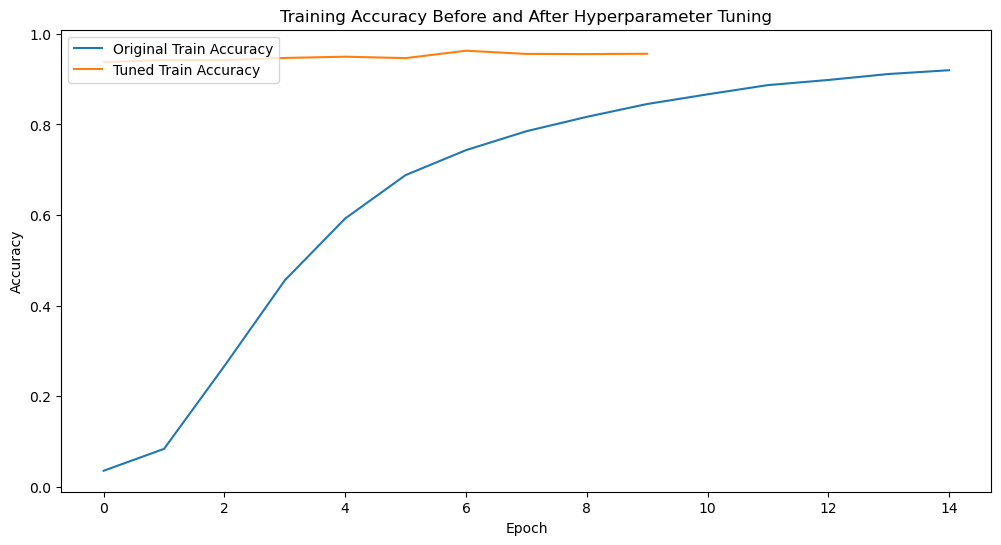

In [19]:
# Plot training accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Original Train Accuracy')
plt.plot(best_history.history['accuracy'], label='Tuned Train Accuracy')
plt.title('Training Accuracy Before and After Hyperparameter Tuning')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

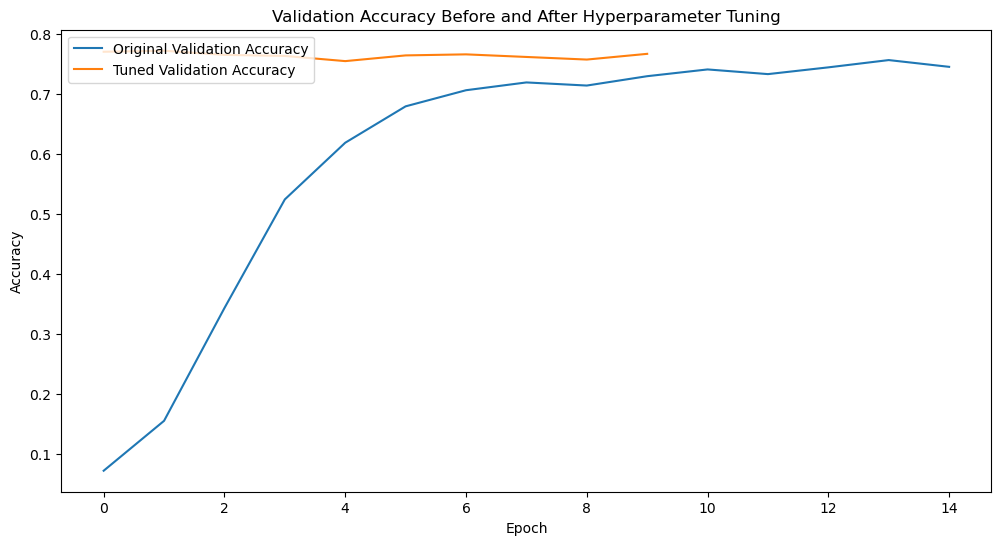

In [20]:
# Plot validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['val_accuracy'], label='Original Validation Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Tuned Validation Accuracy')
plt.title('Validation Accuracy Before and After Hyperparameter Tuning')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [21]:
# Save the original model
model.save('original_model.h5')
print("Original model saved as 'original_model.h5'")

Original model saved as 'original_model.h5'


In [22]:
# Retrieve the best model from the tuner
best_model = tuner.get_best_models(num_models=1)[0]

# Save the best tuned model
best_model.save('best_tuned_model.h5')
print("Best tuned model saved as 'best_tuned_model.h5'")

Best tuned model saved as 'best_tuned_model.h5'


In [24]:
class_map = {
    0: "अ", 1: "आ", 2: "इ", 3: "ई", 4: "उ", 5: "ऊ", 6: "ऋ", 7: "ॠ", 8: "ऌ", 9: "ॡ",
    10: "ऍ", 11: "ऎ", 12: "ए", 13: "ऐ", 14: "ऑ", 15: "ऒ", 16: "ओ", 17: "औ",
    18: "क", 19: "ख", 20: "ग", 21: "घ", 22: "ङ",
    23: "च", 24: "छ", 25: "ज", 26: "झ", 27: "ञ",
    28: "ट", 29: "ठ", 30: "ड", 31: "ढ", 32: "ण",
    33: "त", 34: "थ", 35: "द", 36: "ध", 37: "न",
    38: "प", 39: "फ", 40: "ब", 41: "भ", 42: "म",
    43: "य", 44: "र", 45: "ल", 46: "व",
    47: "श", 48: "ष", 49: "स", 50: "ह",
    51: "ळ", 52: "क्ष", 53: "ज्ञ", 54: "त्र",
    55: "श्र", 56: "ज्ञ", 57: "क्ष", 58: "श्र", 59: "ज्ञ", 60: "क्ष",
    61: "त्र", 62: "ज्ञ", 63: "श्र", 64: "ट्र", 65: "ड्र",
    66: "तृ", 67: "थृ", 68: "दृ", 69: "धृ", 70: "नृ",
    71: "पृ", 72: "फृ", 73: "बृ", 74: "भृ", 75: "मृ",
    76: "यर", 77: "रर", 78: "लर", 79: "वर",
    80: "सर", 81: "शर", 82: "षर", 83: "हर",
    84: "ळर", 85: "क्ष", 86: "ज्ञ", 87: "त्र",
    88: "श्र", 89: "ज्ञ", 90: "क्ष", 91: "त्र",
    92: "ज्ञ", 93: "श्र", 94: "ट्र", 95: "ड्र",
    96: "तृ", 97: "थृ", 98: "दृ", 99: "धृ",
    100: "नृ", 101: "पृ", 102: "फृ", 103: "बृ",
    104: "भृ", 105: "मृ", 106: "यर", 107: "रर",
    108: "लर", 109: "वर", 110: "सर", 111: "शर",
    112: "षर", 113: "हर", 114: "ळर", 115: "क्ष",
    116: "ज्ञ", 117: "त्र", 118: "श्र", 119: "ज्ञ",
    120: "क्ष", 121: "त्र", 122: "ज्ञ", 123: "श्र",
    124: "ट्र", 125: "ड्र", 126: "तृ", 127: "थृ",
    128: "दृ", 129: "धृ", 130: "नृ", 131: "पृ",
    132: "फृ", 133: "बृ", 134: "भृ", 135: "मृ",
    136: "यर", 137: "रर", 138: "लर", 139: "वर",
    140: "सर", 141: "शर", 142: "षर", 143: "हर",
    144: "ळर", 145: "क्ष", 146: "ज्ञ", 147: "त्र",
    148: "श्र", 149: "ज्ञ", 150: "क्ष", 151: "त्र",
    152: "ज्ञ", 153: "श्र", 154: "ट्र", 155: "ड्र",
    156: "तृ", 157: "थृ", 158: "दृ", 159: "धृ",
    160: "नृ", 161: "पृ", 162: "फृ", 163: "बृ",
    164: "भृ", 165: "मृ", 166: "यर", 167: "रर",
    168: "लर", 169: "वर", 170: "सर", 171: "शर",
    172: "षर", 173: "हर"
}

# Predict the class for multiple test images
num_predictions = 50  # Set the number of images you want to predict
for i in range(num_predictions):
    test_image = x_test[i:i+1]  # Select one image from the test set
    prediction = model.predict(test_image)  # Get the prediction for that image
    decoded_letter = class_map[np.argmax(prediction)]  # Decode the prediction
    predicted_class_index = np.argmax(prediction)  # Get the predicted class index
    
    # Print the predicted class index and decoded letter
    print(f"Prediction for image {i + 1}:")
    print(f"Predicted class index: {predicted_class_index}")
    print(f"Decoded Sanskrit letter: {decoded_letter}")
    print("-" * 30)  # Separator for readability

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Prediction for image 1:
Predicted class index: 173
Decoded Sanskrit letter: हर
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction for image 2:
Predicted class index: 40
Decoded Sanskrit letter: ब
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Prediction for image 3:
Predicted class index: 26
Decoded Sanskrit letter: झ
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction for image 4:
Predicted class index: 62
Decoded Sanskrit letter: ज्ञ
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction for image 5:
Predicted class index: 50
Decoded Sanskrit letter: ह
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Prediction for image 6:
Predicted class index: 41
Decoded Sanskrit letter: भ
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for image 7:
Predicted class index: 40
Decoded Sanskrit letter: ब
----

KeyError: 267